<a href="https://colab.research.google.com/github/plthiyagu/Personnel/blob/master/Heart_Disease_and_Some_scikit_learn_Magic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import matplotlib.gridspec as gridspec
from matplotlib.ticker import MaxNLocator

import math
import random
import os
import time

from numpy import interp

import warnings
warnings.filterwarnings('ignore') 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Styling.
cust_palt = [
    '#111d5e', '#c70039', '#f37121', '#ffbd69', '#ffc93c'
]

plt.style.use('ggplot')

In [3]:
def seed_all(seed):
    
    ''' A function to seed everything for getting stable results and reproducibility'''
    
    random.seed(seed)
    np.random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)

seed = 42    
seed_all(seed)

In [4]:
filepath='https://raw.githubusercontent.com/plthiyagu/Personnel/master/Dataset/heart.csv'
df= pd.read_csv(filepath)

In [5]:
df.shape

(297, 14)

In [6]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
print(
    f'Train data has {df.shape[1]} features, {df.shape[0]} observations.\nTrain features are:\n{df.columns.tolist()}\n'
)

Train data has 14 features, 297 observations.
Train features are:
['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']



In [8]:
df.isnull().sum().sum()


0

In [114]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [10]:
# Renaming columns.
df.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'condition']


In [11]:
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,condition
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [156]:
df.nunique()

age          41
sex           2
cp            4
trestbps     48
chol        149
fbs           2
restecg       3
thalach      90
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [12]:
df['sex'] = df['sex'].map({0:'female',1:'male'})
df['chest_pain_type'] = df['chest_pain_type'].map({3:'asymptomatic', 1:'atypical_angina', 2:'non_anginal_pain', 0:'typical_angina'})
df['fasting_blood_sugar'] = df['fasting_blood_sugar'].map({0:'less_than_120mg/ml',1:'greater_than_120mg/ml'})
df['rest_ecg'] = df['rest_ecg'].map({0:'normal',1:'ST-T_wave_abnormality',2:'left_ventricular_hypertrophy'})
df['exercise_induced_angina'] = df['exercise_induced_angina'].map({0:'no',1:'yes'})
df['st_slope'] = df['st_slope'].map({0:'upsloping',1:'flat',2:'downsloping'})
df['thalassemia'] = df['thalassemia'].map({1:'fixed_defect',0:'normal',2:'reversable_defect'})
df['condition'] = df['condition'].map({0:'no_disease', 1:'has_disease'})

In [13]:
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,condition
0,63,male,asymptomatic,145,233,greater_than_120mg/ml,normal,150,no,2.3,upsloping,0,fixed_defect,has_disease
1,37,male,non_anginal_pain,130,250,less_than_120mg/ml,ST-T_wave_abnormality,187,no,3.5,upsloping,0,reversable_defect,has_disease
2,41,female,atypical_angina,130,204,less_than_120mg/ml,normal,172,no,1.4,downsloping,0,reversable_defect,has_disease
3,56,male,atypical_angina,120,236,less_than_120mg/ml,ST-T_wave_abnormality,178,no,0.8,downsloping,0,reversable_defect,has_disease
4,57,female,typical_angina,120,354,less_than_120mg/ml,ST-T_wave_abnormality,163,yes,0.6,downsloping,0,reversable_defect,has_disease


In [14]:
# Masks for easier selection:
categorical = [i for i in df.loc[:,df.nunique()<=10]]
continuous = [i for i in df.loc[:,df.nunique()>=10]]


In [15]:
categorical

['sex',
 'chest_pain_type',
 'fasting_blood_sugar',
 'rest_ecg',
 'exercise_induced_angina',
 'st_slope',
 'num_major_vessels',
 'thalassemia',
 'condition']

In [16]:
continuous

['age',
 'resting_blood_pressure',
 'cholesterol',
 'max_heart_rate_achieved',
 'st_depression']

Univariate analysis is the simplest form of analyzing data. “Uni” means “one”, so in other words your data has only one variable. It doesn't deal with causes or relationships (unlike regression) and it's major purpose is to describe; It takes data, summarizes that data and finds patterns in the data.



In [17]:
def ctg_dist(df, cols, hue=None,rows=3, columns=3):
    
    '''A function for displaying cateorical distribution'''
    
    fig, axes = plt.subplots(rows, columns, figsize=(16, 12))
    axes = axes.flatten()

    for i, j in zip(df[cols].columns, axes):
        sns.countplot(x=i,
                    data=df,
                    palette=cust_palt,
                    hue=hue,
                    ax=j,
                    order=df[i].value_counts().index)
        j.tick_params(labelrotation=10)
        
        total = float(len(df[i]))
        
        j.set_title(f'{str(i).capitalize()} Distribution')
        
        
        for p in j.patches:
            height = p.get_height()
            j.text(p.get_x() + p.get_width() / 2.,
                    height + 2,
                    '{:1.2f}%'.format((height / total) * 100),
                    ha='center')
        
        plt.tight_layout()

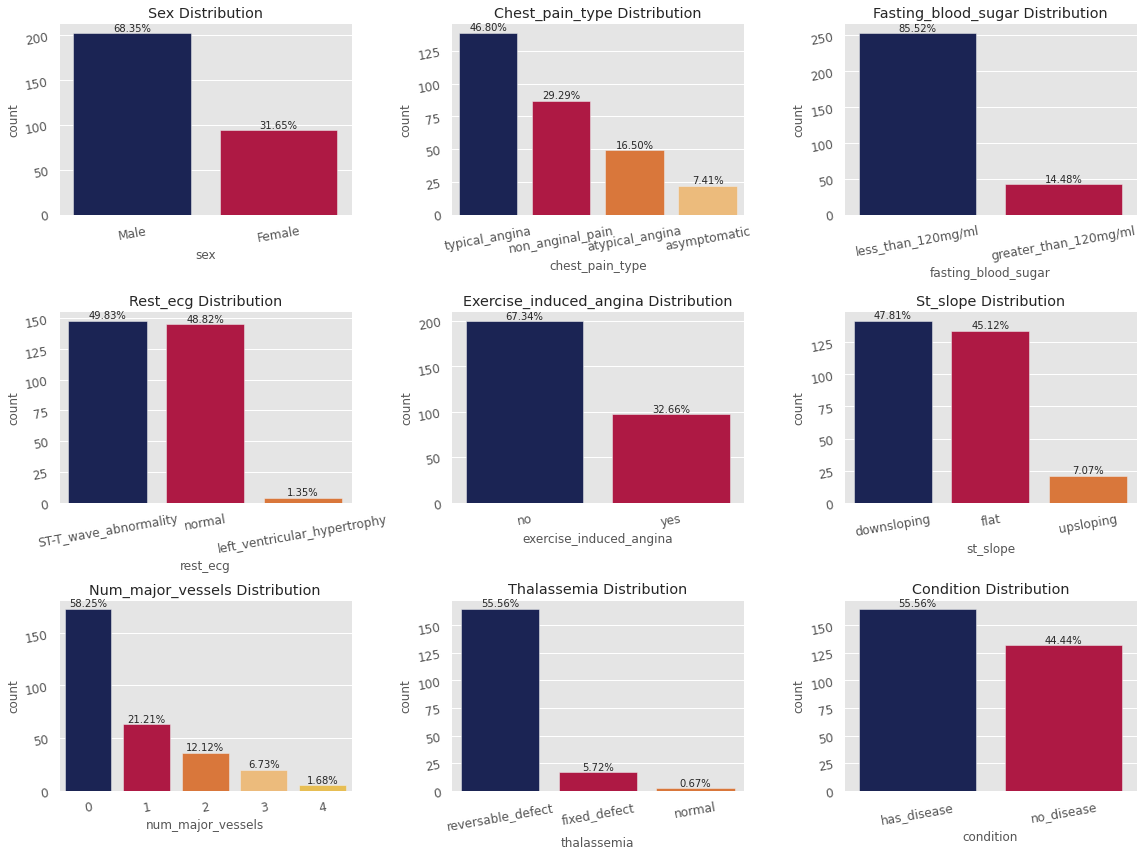

In [124]:
ctg_dist(df, categorical)

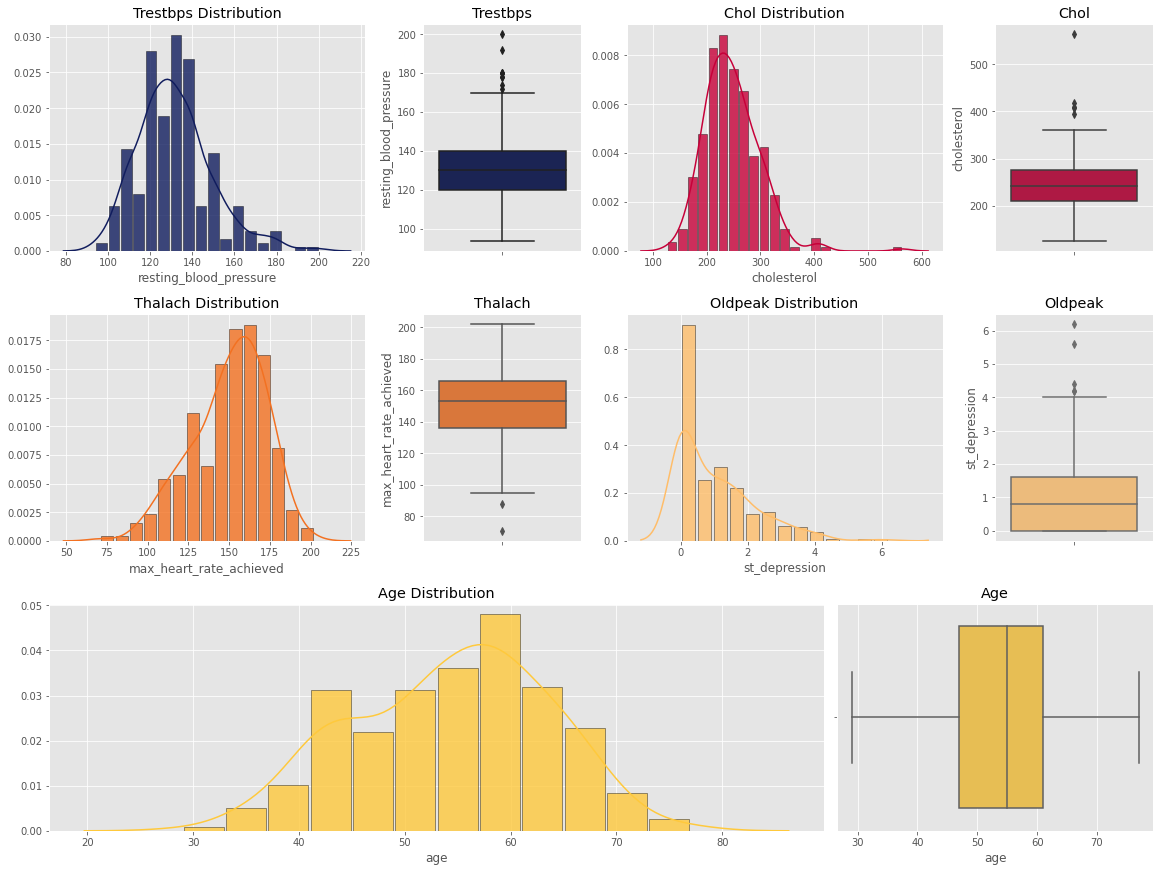

In [19]:
# Displaying numeric distribution:

fig = plt.figure(constrained_layout=True, figsize=(16, 12))


grid = gridspec.GridSpec(ncols=6, nrows=3, figure=fig)

ax1 = fig.add_subplot(grid[0, :2])

ax1.set_title('Trestbps Distribution')

sns.distplot(df[continuous[1]],
                 hist_kws={
                 'rwidth': 0.85,
                 'edgecolor': 'black',
                 'alpha': 0.8},
                 color=cust_palt[0])

ax15 = fig.add_subplot(grid[0, 2:3])

ax15.set_title('Trestbps')

sns.boxplot(df[continuous[1]], orient='v', color=cust_palt[0])

ax2 = fig.add_subplot(grid[0, 3:5])

ax2.set_title('Chol Distribution')

sns.distplot(df[continuous[2]],
                 hist_kws={
                 'rwidth': 0.85,
                 'edgecolor': 'black',
                 'alpha': 0.8},
                 color=cust_palt[1])

ax25 = fig.add_subplot(grid[0, 5:])

ax25.set_title('Chol')

sns.boxplot(df[continuous[2]], orient='v', color=cust_palt[1])

ax3 = fig.add_subplot(grid[1, :2])

ax3.set_title('Thalach Distribution')

sns.distplot(df[continuous[3]],
                 hist_kws={
                 'rwidth': 0.85,
                 'edgecolor': 'black',
                 'alpha': 0.8},
                 color=cust_palt[2])

ax35 = fig.add_subplot(grid[1, 2:3])

ax35.set_title('Thalach')

sns.boxplot(df[continuous[3]], orient='v', color=cust_palt[2])

ax4 = fig.add_subplot(grid[1, 3:5])

ax4.set_title('Oldpeak Distribution')

sns.distplot(df[continuous[4]],
                 hist_kws={
                 'rwidth': 0.85,
                 'edgecolor': 'black',
                 'alpha': 0.8},
                 color=cust_palt[3])

ax45 = fig.add_subplot(grid[1, 5:])

ax45.set_title('Oldpeak')

sns.boxplot(df[continuous[4]], orient='v', color=cust_palt[3])

ax5 = fig.add_subplot(grid[2, :4])

ax5.set_title('Age Distribution')

sns.distplot(df[continuous[0]],
                 hist_kws={
                 'rwidth': 0.95,
                 'edgecolor': 'black',
                 'alpha': 0.8},
                 color=cust_palt[4])

ax55 = fig.add_subplot(grid[2, 4:])

ax55.set_title('Age')

sns.boxplot(df[continuous[0]], orient='h', color=cust_palt[4])

plt.show()

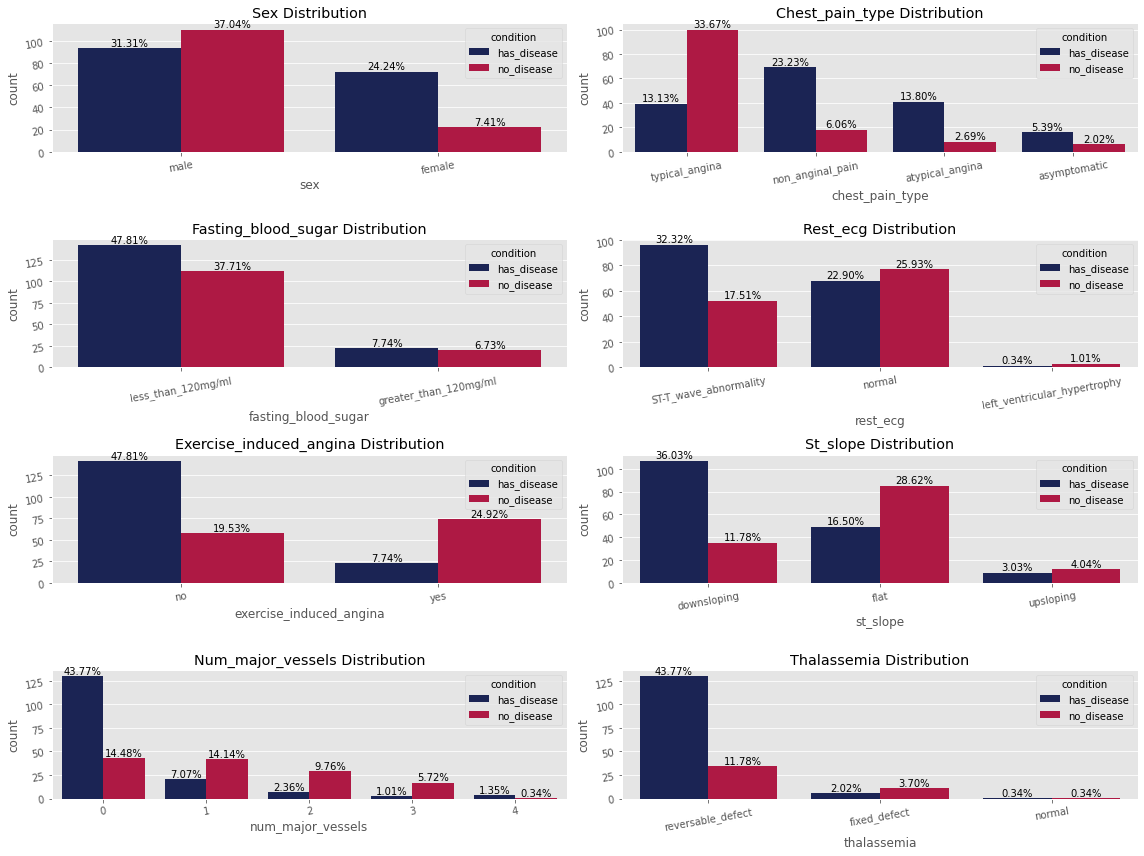

In [20]:
ctg_dist(df, categorical[:-1], 'condition', 4, 2)

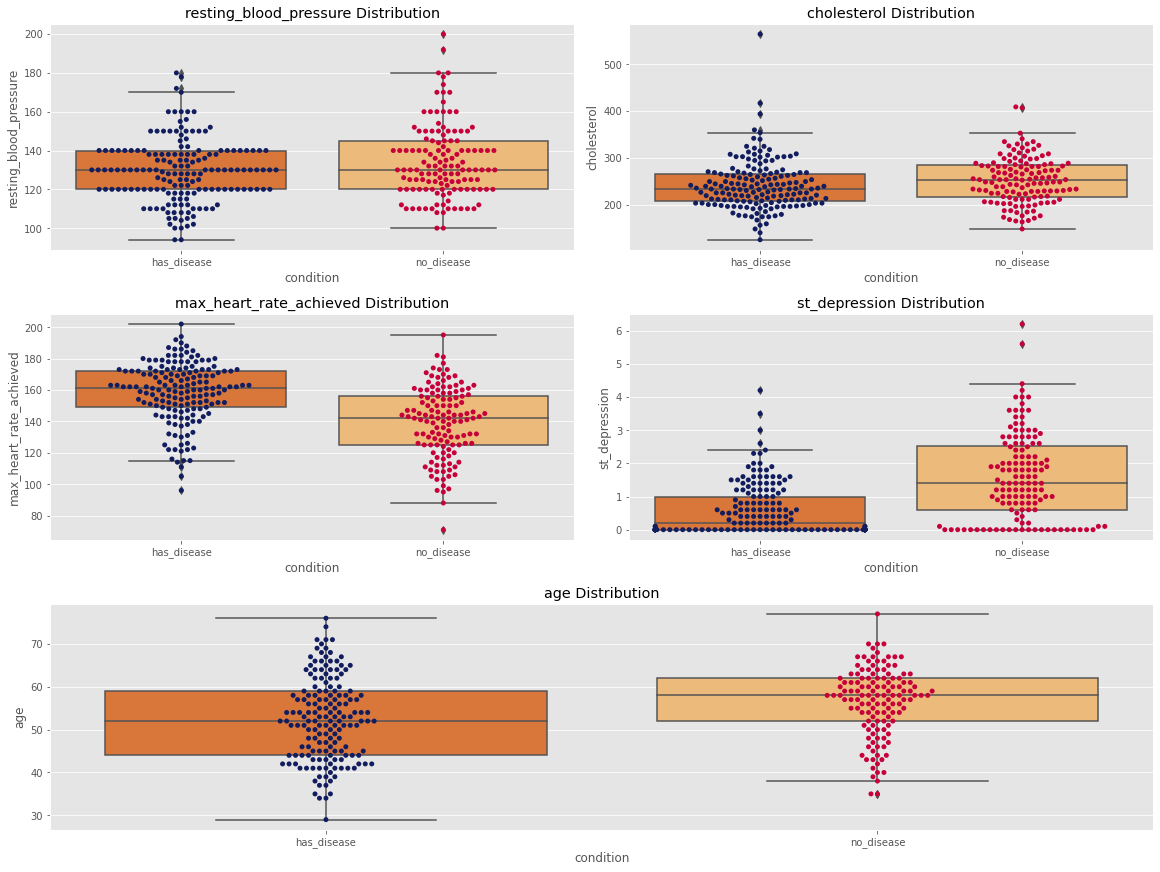

In [21]:
# Displaying numeric distribution vs condition:

fig = plt.figure(constrained_layout=True, figsize=(16, 12))


grid = gridspec.GridSpec(ncols=4, nrows=3, figure=fig)

ax1 = fig.add_subplot(grid[0, :2])

ax1.set_title('resting_blood_pressure Distribution')

sns.boxplot(x='condition',
                    y='resting_blood_pressure',
                    data=df,
                    palette=cust_palt[2:],
                    ax=ax1)
sns.swarmplot(x='condition',
                    y='resting_blood_pressure',
                    data=df,
                    palette=cust_palt[:2],
                    ax=ax1)

ax2 = fig.add_subplot(grid[0, 2:])

ax2.set_title('cholesterol Distribution')

sns.boxplot(x='condition',
                    y='cholesterol',
                    data=df,
                    palette=cust_palt[2:],
                    ax=ax2)
sns.swarmplot(x='condition',
                    y='cholesterol',
                    data=df,
                    palette=cust_palt[:2],
                    ax=ax2)

ax3 = fig.add_subplot(grid[1, :2])

ax3.set_title('max_heart_rate_achieved Distribution')

sns.boxplot(x='condition',
                    y='max_heart_rate_achieved',
                    data=df,
                    palette=cust_palt[2:],
                    ax=ax3)
sns.swarmplot(x='condition',
                    y='max_heart_rate_achieved',
                    data=df,
                    palette=cust_palt[:2],
                    ax=ax3)

ax4 = fig.add_subplot(grid[1, 2:])

ax4.set_title('st_depression Distribution')

sns.boxplot(x='condition',
                    y='st_depression',
                    data=df,
                    palette=cust_palt[2:],
                    ax=ax4)
sns.swarmplot(x='condition',
                    y='st_depression',
                    data=df,
                    palette=cust_palt[:2],
                    ax=ax4)

ax5 = fig.add_subplot(grid[2, :])

ax5.set_title('age Distribution')

sns.boxplot(x='condition',
                    y='age',
                    data=df,
                    palette=cust_palt[2:],
                    ax=ax5)
sns.swarmplot(x='condition',
                    y='age',
                    data=df,
                    palette=cust_palt[:2],
                    ax=ax5)
plt.show()


Multivariate analysis (MVA) is based on the principles of multivariate statistics, which involves observation and analysis of more than one statistical outcome variable at a time. Typically, MVA is used to address the situations where multiple measurements are made on each experimental unit and the relations among these measurements and their structures are important.

<Figure size 1152x720 with 0 Axes>

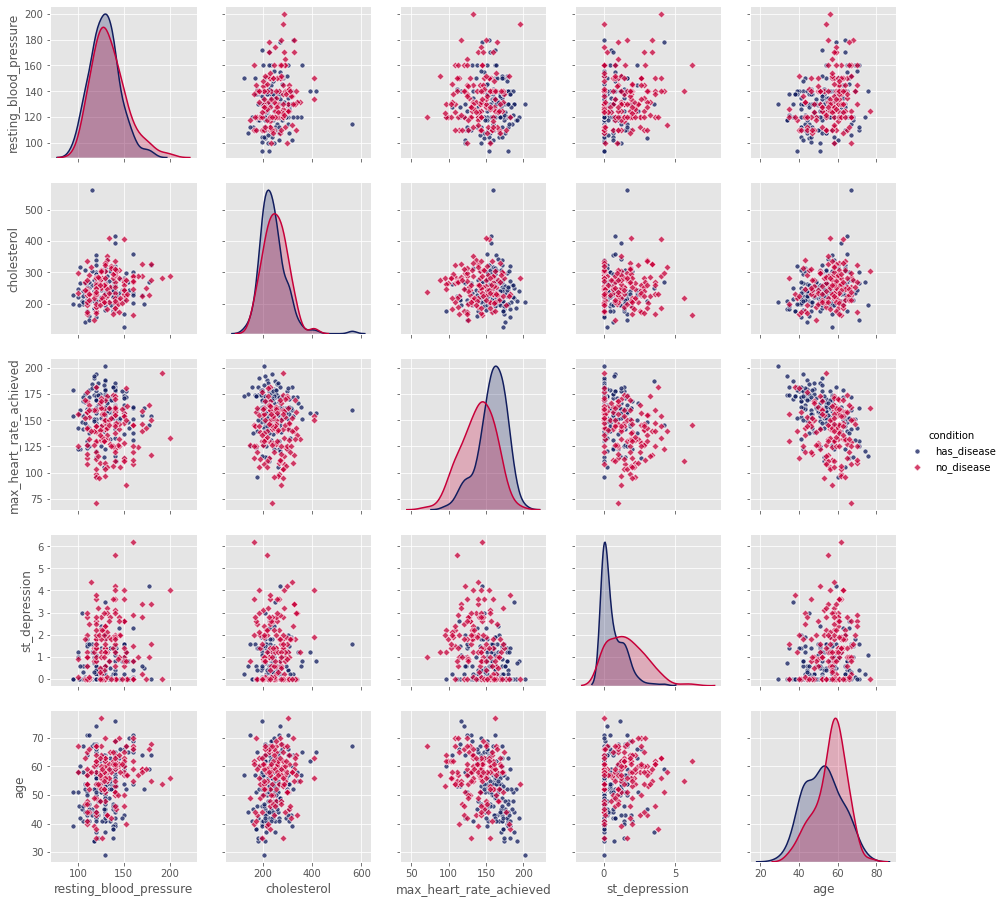

In [22]:
# Numeric data vs each other and condition:

plt.figure(figsize=(16, 10))
sns.pairplot(df[['resting_blood_pressure','cholesterol','max_heart_rate_achieved','st_depression','age', 'condition']], hue='condition', palette=cust_palt,
           markers=['o','D'], plot_kws=dict(s=25, alpha=0.75, ci=None)
            )

plt.show()

In [23]:
# 3D scatterplot of numeric data:

fig = px.scatter_3d(df, x='cholesterol', y='max_heart_rate_achieved', z='age', size='st_depression',
              color='condition', opacity=0.8)
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

In [24]:
def ctn_freq(df, cols, xaxi, hue=None,rows=4, columns=1):
    
    ''' A function for displaying numerical data frequency vs age and condition '''
    
    fig, axes = plt.subplots(rows, columns, figsize=(16, 12), sharex=True)
    axes = axes.flatten()

    for i, j in zip(df[cols].columns, axes):
        sns.pointplot(x=xaxi,
                      y=i,
                    data=df,
                    palette=cust_palt[:2],
                    hue=hue,
                    ax=j,ci=False)      
        j.set_title(f'{str(i).capitalize()} vs. Age')

        
        plt.tight_layout()

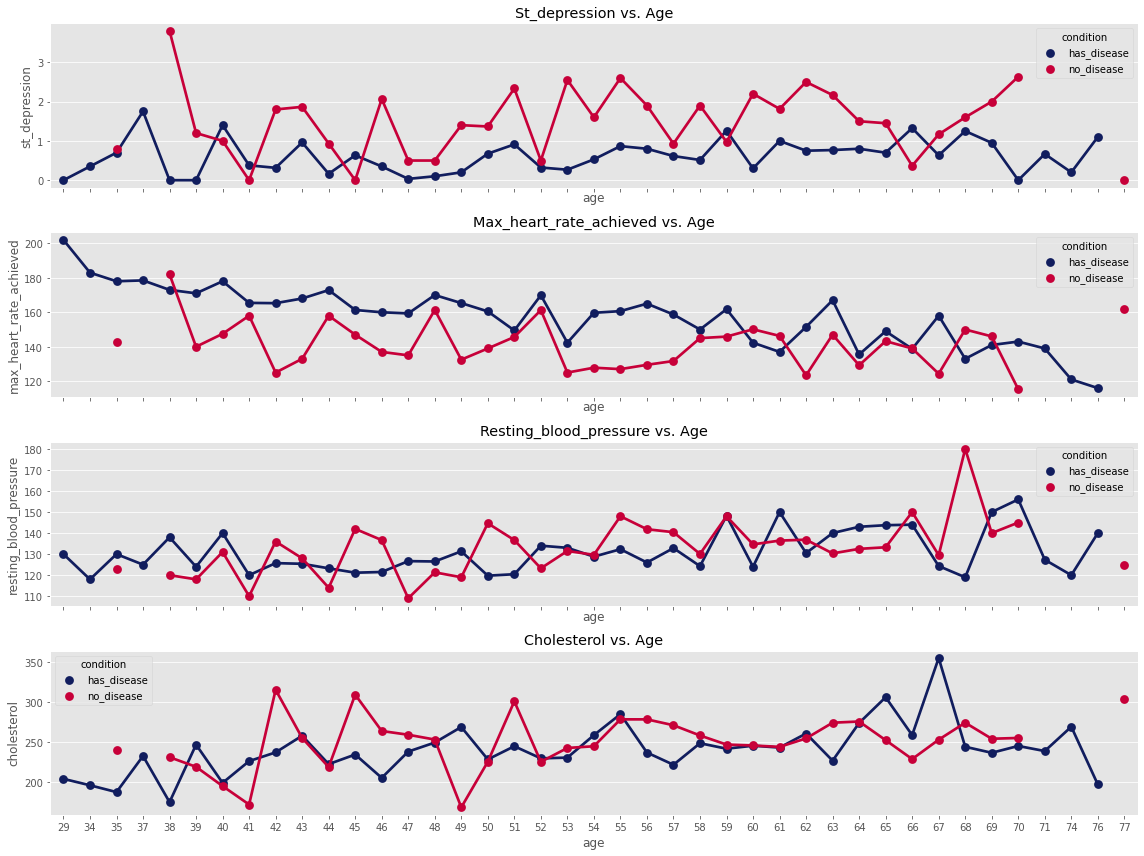

In [25]:
ctn_freq(df, ['st_depression','max_heart_rate_achieved','resting_blood_pressure','cholesterol'], 'age', hue='condition',rows=4, columns=1)

In [26]:
heat_train = pd.read_csv('https://raw.githubusercontent.com/plthiyagu/Personnel/master/Dataset/heart_cleveland_upload.csv')

In [ ]:
heat_train.shape

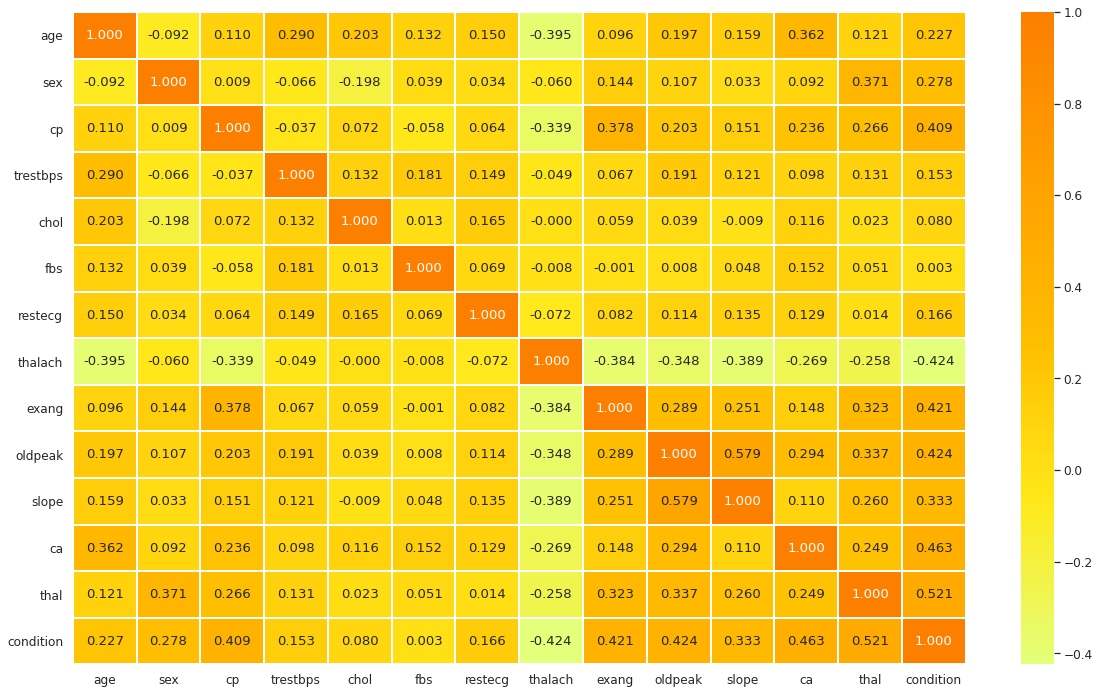

In [28]:
# Correlation heatmap between variables:

sns.set(font_scale=1.1)
correlation_train = heat_train.corr()
mask = np.triu(correlation_train.corr())
plt.figure(figsize=(20, 12))
sns.heatmap(correlation_train,
            annot=True,
            fmt='.3f',
            cmap='Wistia',
            linewidths=1,
            cbar=True)

plt.show()

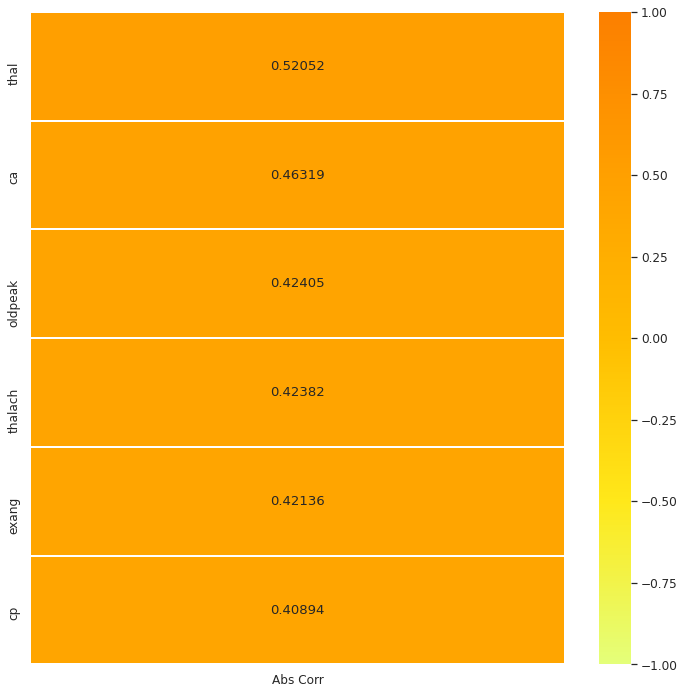

In [29]:
# Top correlated variables vs condition:

correlations = heat_train.corrwith(heat_train['condition']).iloc[:-1].to_frame()
correlations['Abs Corr'] = correlations[0].abs()
sorted_correlations = correlations.sort_values('Abs Corr', ascending=False)['Abs Corr']
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(sorted_correlations.to_frame()[sorted_correlations>=.35], cmap='Wistia', annot=True, vmin=-1, vmax=1,linewidths=1,fmt='.5f', ax=ax);

In [30]:
# Setting train and condition data:

X = df.drop('condition', axis=1)
y = heat_train['condition']

In [31]:
# Loading sklearn packages:

from sklearn.model_selection import cross_validate, KFold, learning_curve,  cross_val_score, RandomizedSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, IsolationForest
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.covariance import EllipticEnvelope
from sklearn.decomposition import PCA
from sklearn.metrics import plot_confusion_matrix

Gradient Tree Boosting or Gradient Boosted Decision Trees (GBDT) is a generalization of boosting to arbitrary differentiable loss functions. GBDT is an accurate and effective off-the-shelf procedure that can be used for both regression and classification problems in a variety of areas including Web search ranking and ecology.

Neighbors-based classification is a type of instance-based learning or non-generalizing learning: it does not attempt to construct a general internal model, but simply stores instances of the training data. Classification is computed from a simple majority vote of the nearest neighbors of each point: a query point is assigned the data class which has the most representatives within the nearest neighbors of the point.

## DecisionTreeClassifier

> Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. Decision trees learn from data to approximate a sine curve with a set of if-then-else decision rules. The deeper the tree, the more complex the decision rules and the fitter the model.

## Support Vector Machines

> Support vector machines (SVMs) are a set of supervised learning methods used for classification, regression and outliers detection.
- The advantages of support vector machines are:
    - Effective in high dimensional spaces.
    - Still effective in cases where number of dimensions is greater than the number of samples.
    - Uses a subset of training points in the decision function (called support vectors), so it is also memory efficient.
    - Versatile: different Kernel functions can be specified for the decision function. Common kernels are provided, but it is also possible to specify custom kernels.
    
## RandomForestClassifier

The sklearn.ensemble module includes two averaging algorithms based on randomized decision trees: the RandomForest algorithm and the Extra-Trees method. Both algorithms are perturb-and-combine technique specifically designed for trees. This means a diverse set of classifiers is created by introducing randomness in the classifier construction. The prediction of the ensemble is given as the averaged prediction of the individual classifiers.

## AdaBoostClassifier

An AdaBoost classifier is a meta-estimator that begins by fitting a classifier on the original dataset and then fits additional copies of the classifier on the same dataset but where the weights of incorrectly classified instances are adjusted such that subsequent classifiers focus more on difficult cases.

## MLP Classifier

Multi-layer Perceptron classifier.
This model optimizes the log-loss function using LBFGS or stochastic gradient descent.

## GaussianNB

GaussianNB implements the Gaussian Naive Bayes algorithm for classification. The likelihood of the features is assumed to be Gaussian.

In [32]:
# Selecting some sklearn classifiers:

gradclass = GradientBoostingClassifier(random_state=seed)

knclass = KNeighborsClassifier()

dectree = DecisionTreeClassifier(random_state=seed)

svc = SVC()

randfclass = RandomForestClassifier(random_state=seed)

adaclass = AdaBoostClassifier(random_state=seed)

mlpclass = MLPClassifier(random_state=seed)

gsclass = GaussianNB()

In [33]:
# Setting 5 fold cv:

cv = KFold(5, shuffle=True, random_state=seed)
classifiers = [gradclass, knclass, dectree, svc, randfclass, adaclass, mlpclass, gsclass]

In [34]:
def model_check(X, y, classifiers, cv):
     
  ''' A function for testing multiple classifiers and return several metrics. '''
  model_table = pd.DataFrame()
  row_index = 0
  for cls in classifiers:
    MLA_name = cls.__class__.__name__
    model_table.loc[row_index, 'Model Name'] = MLA_name
    cv_results = cross_validate(cls,X,y,cv=cv,scoring=('accuracy','f1','roc_auc'),return_train_score=True,n_jobs=-1)
    model_table.loc[row_index, 'Train Roc/AUC Mean'] = cv_results['train_roc_auc'].mean()
    model_table.loc[row_index, 'Test Roc/AUC Mean'] = cv_results['test_roc_auc'].mean()
    model_table.loc[row_index, 'Test Roc/AUC Std'] = cv_results['test_roc_auc'].std()
    model_table.loc[row_index, 'Train Accuracy Mean'] = cv_results['train_accuracy'].mean()
    model_table.loc[row_index, 'Test Accuracy Mean'] = cv_results['test_accuracy'].mean()
    model_table.loc[row_index, 'Test Acc Std'] = cv_results['test_accuracy'].std()
    model_table.loc[row_index, 'Train F1 Mean'] = cv_results['train_f1'].mean()
    model_table.loc[row_index, 'Test F1 Mean'] = cv_results['test_f1'].mean()
    model_table.loc[row_index, 'Test F1 Std'] = cv_results['test_f1'].std()
    model_table.loc[row_index, 'Time'] = cv_results['fit_time'].mean()
    row_index += 1        

  model_table.sort_values(by=['Test F1 Mean'],                            
                            ascending=False,
                            inplace=True)

  return model_table

In [35]:
raw_models = model_check(X, y, classifiers, cv)

In [36]:
def f_imp(classifiers, X, y, bins):
    
    ''' A function for displaying feature importances'''
    
    fig, axes = plt.subplots(1, 2, figsize=(20, 6))
    axes = axes.flatten()

    for ax, classifier in zip(axes, classifiers):

        try:
            classifier.fit(X, y)
            feature_imp = pd.DataFrame(sorted(
                zip(classifier.feature_importances_, X.columns)),
                                       columns=['Value', 'Feature'])

            sns.barplot(x="Value",
                        y="Feature",
                        data=feature_imp.sort_values(by="Value",
                                                     ascending=False),
                        ax=ax,
                        palette='plasma')
            plt.title('Features')
            plt.tight_layout()
            ax.set(title=f'{classifier.__class__.__name__} Feature Impotances')
            ax.xaxis.set_major_locator(MaxNLocator(nbins=bins))
        except:
            continue
    plt.show()

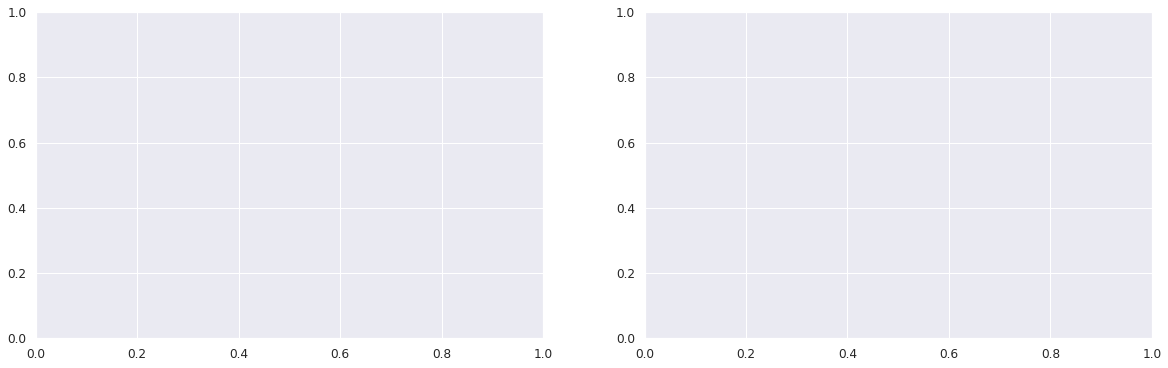

In [143]:
f_imp([randfclass,dectree], X, y, 6)

Before going to tune our models I decided to get rid of some outliers, we have pretty small database and we can actually remove them by hand or more basic methods. But I wanted to use what sklearn can offer us for this so we gonna try couple sklearn features.

Isolation Forest

    The IsolationForest ‘isolates’ observations by randomly selecting a feature and then randomly selecting a split value between the maximum and minimum values of the selected feature.

    Since recursive partitioning can be represented by a tree structure, the number of splittings required to isolate a sample is equivalent to the path length from the root node to the terminating node.

    This path length, averaged over a forest of such random trees, is a measure of normality and our decision function.

    Random partitioning produces noticeably shorter paths for anomalies. Hence, when a forest of random trees collectively produce shorter path lengths for particular samples, they are highly likely to be anomalies.

Basically I set contamination rate of our data to 10% and dropped them using masks. It didn't do great on the results, we have pretty small dataset and removing some more damaging model performances probably. But it's ok for now...

In [37]:
X.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia
0,63,male,asymptomatic,145,233,greater_than_120mg/ml,normal,150,no,2.3,upsloping,0,fixed_defect
1,37,male,non_anginal_pain,130,250,less_than_120mg/ml,ST-T_wave_abnormality,187,no,3.5,upsloping,0,reversable_defect
2,41,female,atypical_angina,130,204,less_than_120mg/ml,normal,172,no,1.4,downsloping,0,reversable_defect
3,56,male,atypical_angina,120,236,less_than_120mg/ml,ST-T_wave_abnormality,178,no,0.8,downsloping,0,reversable_defect
4,57,female,typical_angina,120,354,less_than_120mg/ml,ST-T_wave_abnormality,163,yes,0.6,downsloping,0,reversable_defect


In [39]:

filepath='https://raw.githubusercontent.com/plthiyagu/Personnel/master/Dataset/heart.csv'
df= pd.read_csv(filepath)
# Renaming columns.
df.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'condition']

# Setting train and condition data:

X = df.drop('condition', axis=1)
y = heat_train['condition']

In [41]:
# Applying Isolation Forest:

iso = IsolationForest(contamination=0.1,random_state=seed)
yhat = iso.fit_predict(X)

mask = (yhat != -1)

X_iso = X.loc[mask, :]
y_iso= y[mask]

In [42]:
iso_models = model_check(X_iso, y_iso, classifiers, cv)
display(iso_models)

,Model Name,Train Roc/AUC Mean,Test Roc/AUC Mean,Test Roc/AUC Std,Train Accuracy Mean,Test Accuracy Mean,Test Acc Std,Train F1 Mean,Test F1 Mean,Test F1 Std,Time
4,RandomForestClassifier,1.000000,0.690741,0.048990,1.000000,0.636897,0.050791,1.000000,0.556829,0.078163,0.220000
7,GaussianNB,0.736403,0.674637,0.037037,0.672309,0.621943,0.058456,0.609446,0.554193,0.074739,0.005382
0,GradientBoostingClassifier,0.999447,0.625916,0.074358,0.985007,0.595528,0.062392,0.982835,0.522804,0.079009,0.118753
5,AdaBoostClassifier,0.916146,0.621919,0.082032,0.810925,0.591964,0.081767,0.783169,0.502291,0.115462,0.105677
2,DecisionTreeClassifier,1.000000,0.550987,0.106204,1.000000,0.554158,0.105575,1.000000,0.486020,0.128644,0.005264
6,MLPClassifier,0.695621,0.600487,0.017241,0.639538,0.565479,0.025813,0.507519,0.420727,0.144365,0.171895
1,KNeighborsClassifier,0.704623,0.520809,0.071188,0.659177,0.539343,0.050305,0.583392,0.414183,0.100156,0.005644
3,SVC,0.596437,0.580628,0.041089,0.557123,0.554507,0.028852,0.012121,0.000000,0.000000,0.007837


Elliptic Envelope

Let's try another automatic outlier detection method. We assumed our distribution close to gaussian while inspecting the data so elliptic envelope worth to take a look.

> The Minimum Covariance Determinant (MCD) method is a highly robust estimator of multivariate location and scatter, for which a fast algorithm is available. […] It also serves as a convenient and efficient tool for outlier detection.

This one did a little bit better than isolation forest so let's stick with it for this case...

In [43]:
# Applying Elliptical Envelope:

eli = EllipticEnvelope(contamination=0.1,assume_centered=True, random_state=seed)
yhat = eli.fit_predict(X)

mask = (yhat != -1)

X_eli = X.loc[mask, :]
y_eli= y[mask]

In [44]:
eli_models = model_check(X_eli, y_eli, classifiers, cv)
display(eli_models)

,Model Name,Train Roc/AUC Mean,Test Roc/AUC Mean,Test Roc/AUC Std,Train Accuracy Mean,Test Accuracy Mean,Test Acc Std,Train F1 Mean,Test F1 Mean,Test F1 Std,Time
7,GaussianNB,0.730162,0.675805,0.055048,0.662928,0.633054,0.046094,0.599024,0.553215,0.075717,0.003833
6,MLPClassifier,0.679434,0.582727,0.044614,0.607617,0.539343,0.061222,0.585731,0.517498,0.063375,0.171399
2,DecisionTreeClassifier,1.000000,0.572406,0.097585,1.000000,0.569322,0.090194,1.000000,0.516892,0.131311,0.004707
4,RandomForestClassifier,1.000000,0.642018,0.054868,1.000000,0.595597,0.044209,1.000000,0.506422,0.063491,0.218244
0,GradientBoostingClassifier,0.998435,0.579589,0.048742,0.980330,0.554298,0.034463,0.977362,0.495858,0.049177,0.128155
5,AdaBoostClassifier,0.919403,0.566266,0.037636,0.820276,0.554507,0.047502,0.789485,0.474113,0.042497,0.104176
1,KNeighborsClassifier,0.728861,0.475735,0.035981,0.670409,0.483089,0.023185,0.600220,0.385260,0.038955,0.003487
3,SVC,0.602532,0.545481,0.111138,0.564622,0.558211,0.046822,0.028958,0.000000,0.000000,0.008102


Discretization

    Discretization (otherwise known as quantization or binning) provides a way to partition continuous features into discrete values. Certain datasets with continuous features may benefit from discretization, because discretization can transform the dataset of continuous attributes to one with only nominal attributes.

    One-hot encoded discretized features can make a model more expressive, while maintaining interpretability. For instance, pre-processing with a discretizer can introduce nonlinearity to linear models.

Since we have small and noisy data I thougt binning them would be better choice of action, for this purpose I'm going to choose another sklearn tool:

## K-Bbins Discretization

### This method discretizes features into 'k' bins. Sklearn module takes several strategy parameters but we going to use 'kmeans' strategy which defines bins based on a k-means clustering procedure performed on each feature independently.

In [45]:
def kbin_cat(col, X, nbins=5):

  ''' A function for binning multiple numeric columns'''

  categorize = KBinsDiscretizer(n_bins = nbins, encode = 'onehot', strategy = 'kmeans')
  cat = categorize.fit_transform(X[col].values.reshape(-1,1))
  cat= pd.DataFrame(cat.toarray())
  cat_n = [f'cat_{str(i)}' for i in range(nbins)]
  cat.columns = [i.replace('cat',f'{str(col)}') for i in cat_n]
  cat = cat.astype('int')
    
  return cat

In [46]:
# Applying K-bins discretizer:

rt = ['age','resting_blood_pressure','cholesterol', 'max_heart_rate_achieved','st_depression']
X_cat = X_eli
for i in rt:    
    X_cat = X_cat.join(kbin_cat(i,X,5))
    X_cat.drop(i, axis=1, inplace=True)

In [47]:
binn_models = model_check(X_cat, y_eli, classifiers, cv)
display(binn_models)

,Model Name,Train Roc/AUC Mean,Test Roc/AUC Mean,Test Roc/AUC Std,Train Accuracy Mean,Test Accuracy Mean,Test Acc Std,Train F1 Mean,Test F1 Mean,Test F1 Std,Time
5,AdaBoostClassifier,0.794713,0.646967,0.070044,0.702299,0.622292,0.067094,0.650774,0.542019,0.089869,0.105997
3,SVC,0.844828,0.638378,0.039073,0.748115,0.614605,0.048001,0.695083,0.521558,0.077502,0.007773
6,MLPClassifier,0.909072,0.596551,0.039240,0.813659,0.584067,0.030245,0.778364,0.504558,0.039921,0.392104
0,GradientBoostingClassifier,0.963314,0.564964,0.062035,0.903558,0.588050,0.045719,0.886882,0.497715,0.074180,0.112693
4,RandomForestClassifier,0.999965,0.611396,0.045562,0.996257,0.592103,0.064333,0.995776,0.492290,0.107358,0.215416
1,KNeighborsClassifier,0.795879,0.562481,0.028964,0.736922,0.584416,0.038023,0.690682,0.485017,0.057806,0.003235
2,DecisionTreeClassifier,0.999965,0.523826,0.022869,0.996257,0.532006,0.030803,0.995764,0.462535,0.073656,0.004863
7,GaussianNB,0.735110,0.677830,0.045489,0.636646,0.607058,0.039449,0.419037,0.379433,0.147615,0.003417


Learning Curves

Before finalizing our modelling I wanted to use another tool sklearn offers: Learning Curves. That can show us how fast the models learning and especially how is the model doing with the number of data given so we can decide if more data needed for better results. In our case we can see that some models overfitting and most of our models can get better with the more data...

In [48]:
def plot_learning_curve(classifiers,
                        X,
                        y,
                        ylim=None,
                        cv=None,
                        n_jobs=None,
                        train_sizes=np.linspace(.1, 1.0, 5)):
    
    ''' A function for displaying learning curvers fur multiple ml algorithms'''

    fig, axes = plt.subplots(math.ceil(len(classifiers) / 2),
                             2,
                             figsize=(25, 50))
    axes = axes.flatten()

    for ax, classifier in zip(axes, classifiers):

        ax.set_title(f'{classifier.__class__.__name__} Learning Curve')
        if ylim is not None:
            ax.set_ylim(*ylim)
        ax.set_xlabel('Training examples')
        ax.set_ylabel('Score')

        train_sizes, train_scores, test_scores, fit_times, _ = \
            learning_curve(classifier, X, y, cv=cv, n_jobs=n_jobs,
                           train_sizes=train_sizes,
                           return_times=True, scoring='f1', random_state=seed
                          )
        train_scores_mean = np.mean(train_scores, axis=1)
        train_scores_std = np.std(train_scores, axis=1)
        test_scores_mean = np.mean(test_scores, axis=1)
        test_scores_std = np.std(test_scores, axis=1)

        # Plot learning curve

        ax.fill_between(train_sizes,
                        train_scores_mean - train_scores_std,
                        train_scores_mean + train_scores_std,
                        alpha=0.1,
                        color='r')
        ax.fill_between(train_sizes,
                        test_scores_mean - test_scores_std,
                        test_scores_mean + test_scores_std,
                        alpha=0.1,
                        color='g')
        ax.plot(train_sizes,
                train_scores_mean,
                'o-',
                color='r',
                label='Training score')
        ax.plot(train_sizes,
                test_scores_mean,
                'o-',
                color='g',
                label='Cross-validation score')
        ax.legend(loc='best')
        ax.yaxis.set_major_locator(MaxNLocator(nbins=24))

    plt.show()

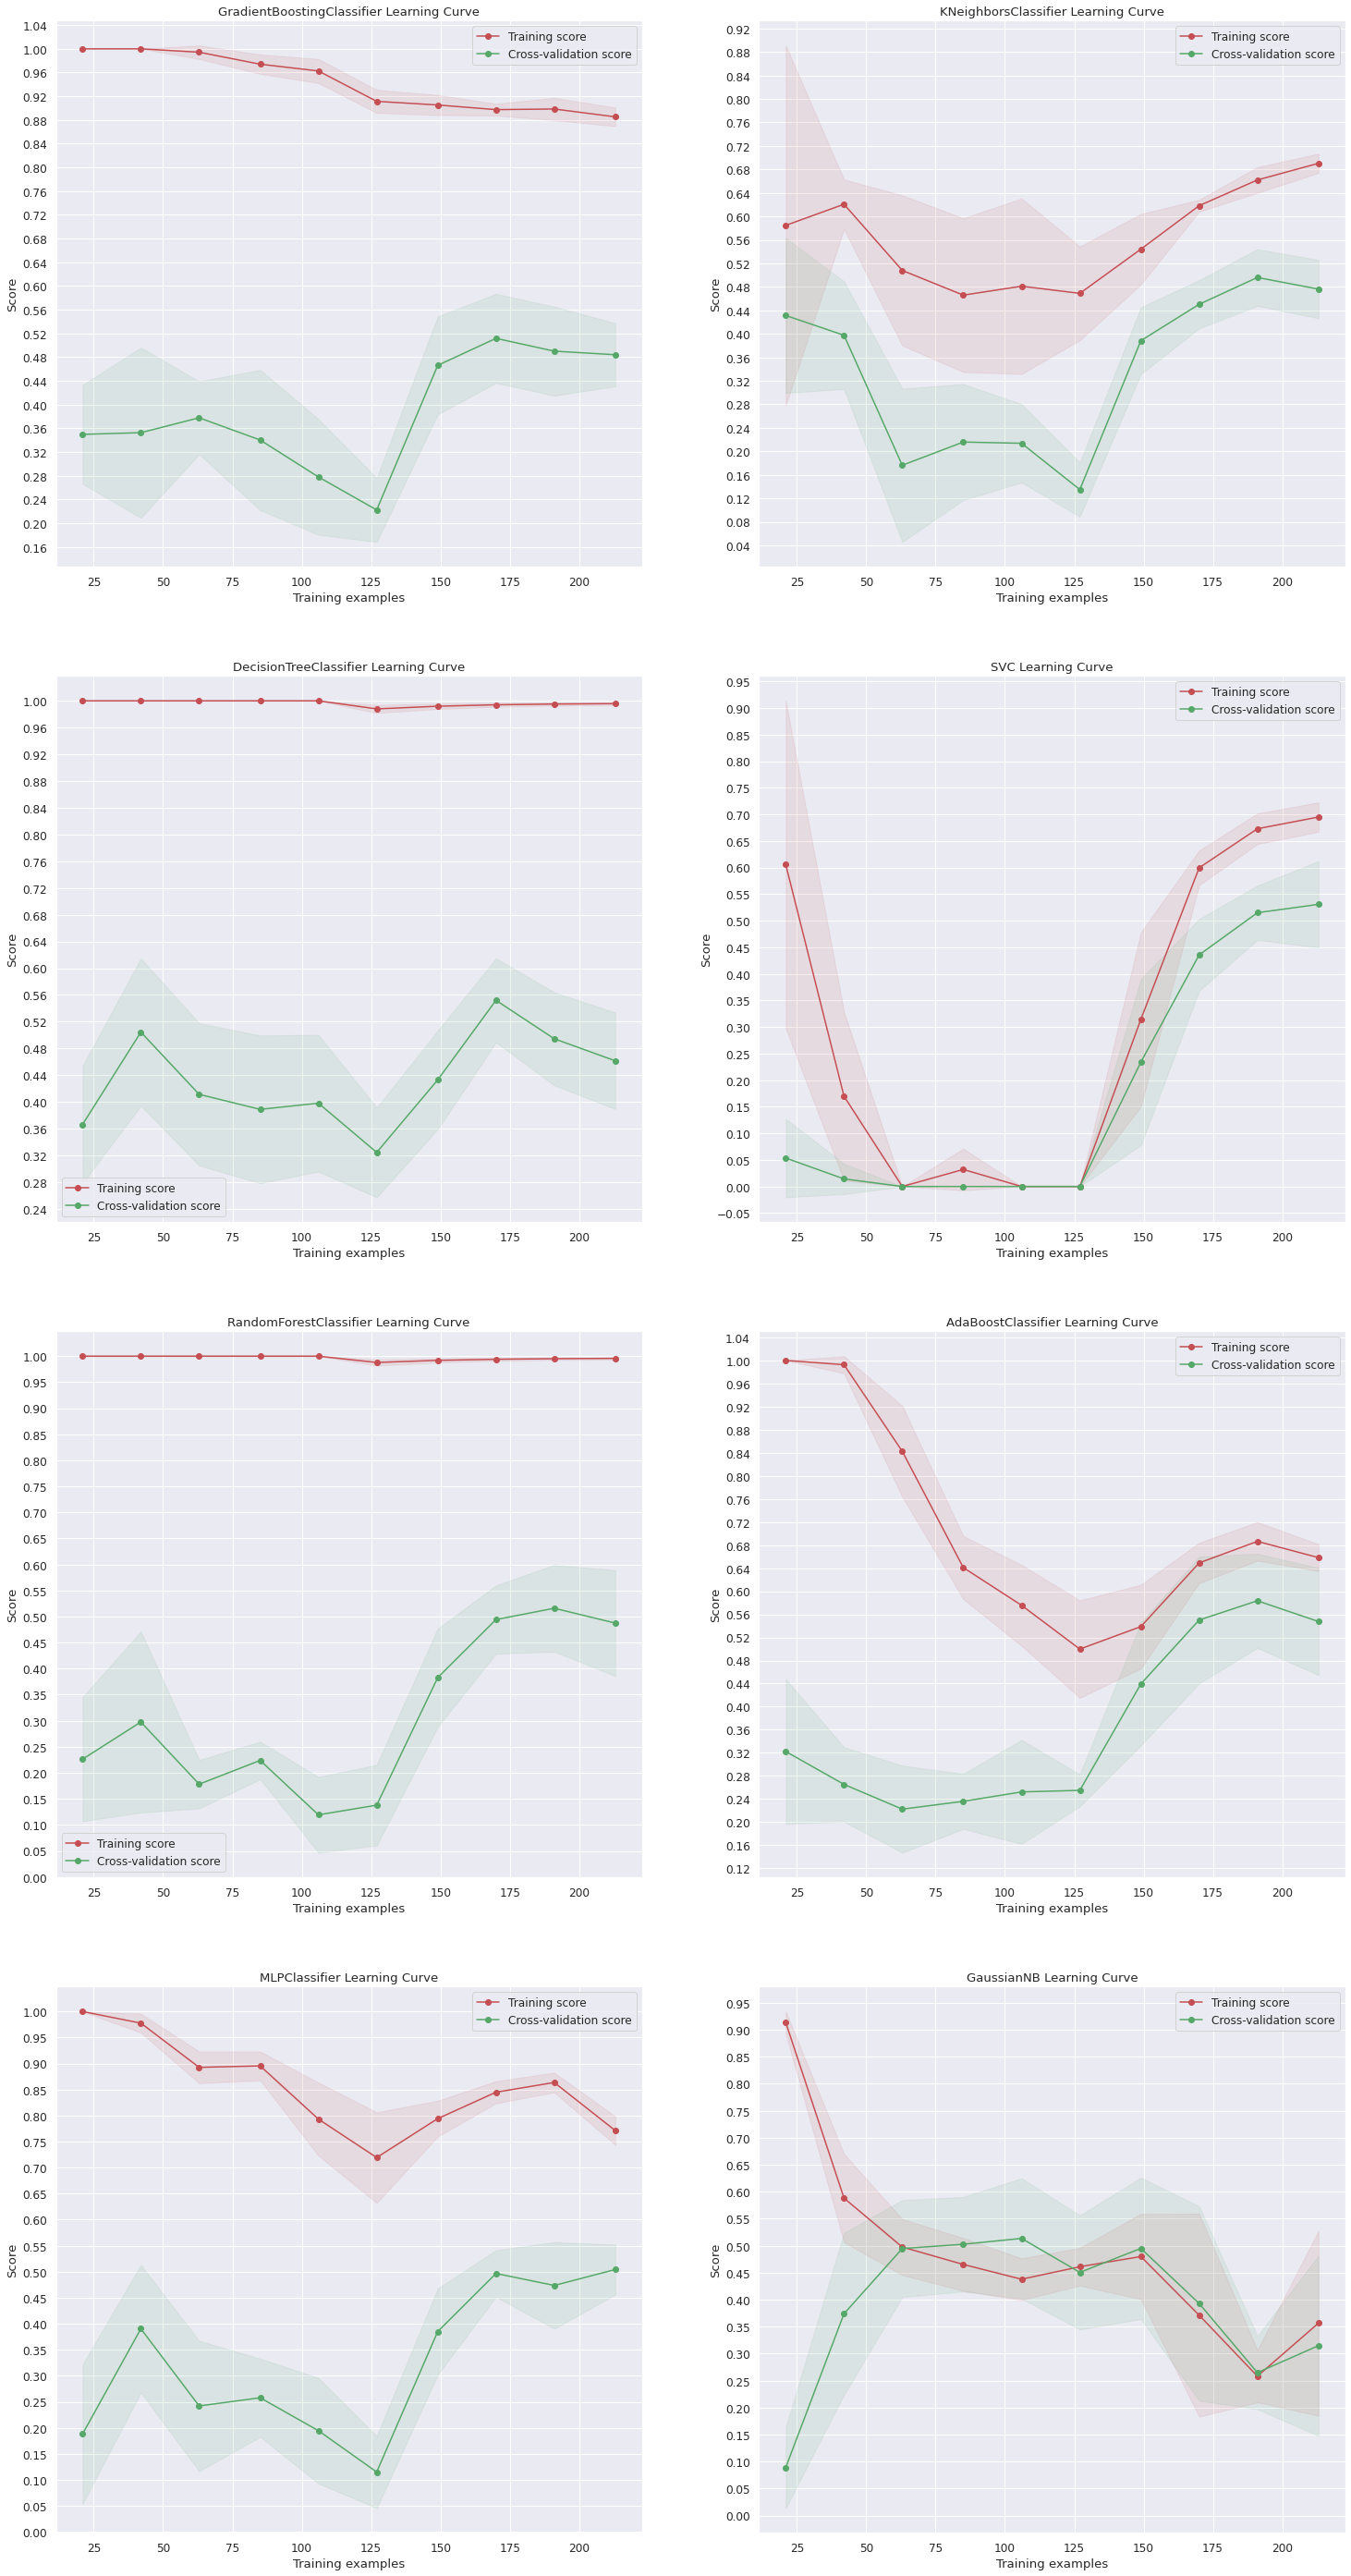

In [49]:
# Displaying learning curves:

plot_learning_curve(classifiers,
                    X_cat,
                    y_eli,
                    ylim=None,
                    cv=cv,
                    n_jobs=-1,
                    train_sizes=np.linspace(.1, 1.0, 10))

RandomizedSearchCV

Let's get rid of overfitting, one of the easiest ways of doing it is tuning parameters for our estimators and regularize them. Thankfully sklearn is coming to help with useful tools for this case too! We going to use RandomizedSearchCV for this:

    While using a grid of parameter settings is currently the most widely used method for parameter optimization, other search methods have more favourable properties. RandomizedSearchCV implements a randomized search over parameters, where each setting is sampled from a distribution over possible parameter values. This has two main benefits over an exhaustive search:

    A budget can be chosen independent of the number of parameters and possible values.

    Adding parameters that do not influence the performance does not decrease efficiency.

I'm going to choose small amount of estimators and not many parameters to search for timing purposes but you'll see even that's useful!

In [50]:
# Fine tuning models:

for i in [randfclass,svc, adaclass]:
    if i == svc:
        parameters = {
        'C': [1,3,9,27],
        'tol': [1e-2, 1e-3, 1e-4],
        'kernel': ['linear', 'rbf', 'sigmoid'],
        'shrinking': [True, False]}
    if i == randfclass:
        parameters = {
            'max_depth': [2, 3, 5],
            'n_estimators': [50, 100, 150],
            'criterion': ['gini', 'entropy'],
            'bootstrap': [True, False],
        }
    if i == adaclass:
        parameters = {
            'base_estimator': [None, dectree],
            'n_estimators': [50, 100, 150],
            'algorithm': ['SAMME','SAMME.R'],
            'learning_rate': [0.8,1,1.2],
        }
    
    
    def hyperparameter_tune(base_model, parameters, n_iter, cv, X, y):
        
        ''' A function for optimizing mutliple classifiers'''
        
        start_time = time.time()
        optimal_model = RandomizedSearchCV(base_model,
                                param_distributions=parameters,
                                n_iter=n_iter,
                                cv=cv,
                                scoring = 'f1',
                                n_jobs=-1,
                                random_state=seed)

        optimal_model.fit(X, y)    


        scores = cross_val_score(optimal_model, X, y, cv=cv,n_jobs=-1, scoring='f1')
        stop_time = time.time()

        print('====================')
        print(f'Updated Parameters for {str(base_model.__class__.__name__)}')
        print('Cross Val Mean: {:.3f}, Cross Val Stdev: {:.3f}'.format(scores.mean(), scores.std()))
        print('Best Score: {:.3f}'.format(optimal_model.best_score_))
        print('Best Parameters: {}'.format(optimal_model.best_params_))
        print('Elapsed Time:', time.strftime('%H:%M:%S', time.gmtime(stop_time - start_time)))
        print('====================')


        return optimal_model.best_params_, optimal_model.best_score_
    best_params, best_score = hyperparameter_tune(i, parameters, 20, cv, X_cat, y_eli)
    i.set_params(**best_params)

Updated Parameters for RandomForestClassifier
Cross Val Mean: 0.501, Cross Val Stdev: 0.093
Best Score: 0.520
Best Parameters: {'n_estimators': 50, 'max_depth': 3, 'criterion': 'gini', 'bootstrap': False}
Elapsed Time: 00:01:14
Updated Parameters for SVC
Cross Val Mean: 0.478, Cross Val Stdev: 0.075
Best Score: 0.522
Best Parameters: {'tol': 0.001, 'shrinking': False, 'kernel': 'rbf', 'C': 1}
Elapsed Time: 00:00:05
Updated Parameters for AdaBoostClassifier
Cross Val Mean: 0.539, Cross Val Stdev: 0.082
Best Score: 0.542
Best Parameters: {'n_estimators': 50, 'learning_rate': 1, 'base_estimator': None, 'algorithm': 'SAMME.R'}
Elapsed Time: 00:01:02


Tuned Model Results
Alright! As you can see even little bit tuned parameters added regularization to our models and increased the CV score for them. That's a good sign! Now we have three decent models to make predictions!

In [51]:
binn_models = model_check(X_cat, y_eli, classifiers, cv)
display(binn_models)

,Model Name,Train Roc/AUC Mean,Test Roc/AUC Mean,Test Roc/AUC Std,Train Accuracy Mean,Test Accuracy Mean,Test Acc Std,Train F1 Mean,Test F1 Mean,Test F1 Std,Time
5,AdaBoostClassifier,0.794713,0.646967,0.070044,0.702299,0.622292,0.067094,0.650774,0.542019,0.089869,0.103327
3,SVC,0.844828,0.638378,0.039073,0.748115,0.614605,0.048001,0.695083,0.521558,0.077502,0.008112
4,RandomForestClassifier,0.819007,0.668616,0.047382,0.729406,0.637037,0.042265,0.652171,0.519659,0.074577,0.077100
6,MLPClassifier,0.909072,0.596551,0.039240,0.813659,0.584067,0.030245,0.778364,0.504558,0.039921,0.384449
0,GradientBoostingClassifier,0.963314,0.564964,0.062035,0.903558,0.588050,0.045719,0.886882,0.497715,0.074180,0.116020
1,KNeighborsClassifier,0.795879,0.562481,0.028964,0.736922,0.584416,0.038023,0.690682,0.485017,0.057806,0.003306
2,DecisionTreeClassifier,0.999965,0.523826,0.022869,0.996257,0.532006,0.030803,0.995764,0.462535,0.073656,0.004906
7,GaussianNB,0.735110,0.677830,0.045489,0.636646,0.607058,0.039449,0.419037,0.379433,0.147615,0.003372


 Dimension Reduction Using PCA

    PCA is used to decompose a multivariate dataset in a set of successive orthogonal components that explain a maximum amount of the variance. In scikit-learn, PCA is implemented as a transformer object that learns components in its fit method, and can be used on new data to project it on these components.

Reducing dimensions is useful for bigger datasets because by transforming a large set of variables into a smaller one that still contains most of the information in the large set makes your modelling faster. This is not the case here since we have very small data but we still can use it for visualization which I find it cool...

In [54]:
from sklearn.decomposition import PCA


In [55]:
pca = PCA()
pca.fit(X_cat)
pca_samples = pca.transform(X_cat)

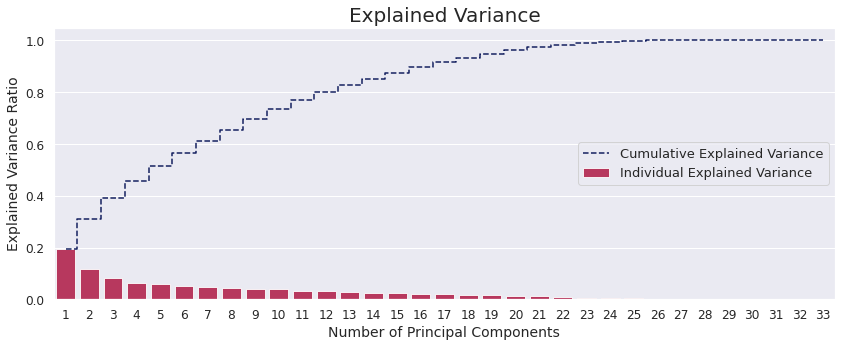

In [56]:
# Explaining variance ratio:

fig, ax = plt.subplots(figsize=(14, 5))
plt.plot(range(X_cat.shape[1]), pca.explained_variance_ratio_.cumsum(), linestyle='--', drawstyle='steps-mid', color=cust_palt[0],
         label='Cumulative Explained Variance')
sns.barplot(np.arange(1,X_cat.shape[1]+1), pca.explained_variance_ratio_, alpha=0.85, color=cust_palt[1],
            label='Individual Explained Variance')

plt.ylabel('Explained Variance Ratio', fontsize = 14)
plt.xlabel('Number of Principal Components', fontsize = 14)
ax.set_title('Explained Variance', fontsize = 20)
plt.legend(loc='center right', fontsize = 13);

In [57]:
pca = PCA(5)
pca.fit(X_cat)
pca_samples = pca.transform(X_cat)

In [58]:
# Displaying 50% of the variance:

total_var = pca.explained_variance_ratio_.sum() * 100

labels = {str(i): f'PC {i+1}' for i in range(5)}
labels['color'] = 'condition'

fig = px.scatter_matrix(
    pca_samples,
    color=y_eli,
    dimensions=range(5),
    labels=labels,
    title=f'Total Explained Variance: {total_var:.2f}%',
    opacity=0.8,
    color_continuous_scale=cust_palt,
)
fig.update_traces(diagonal_visible=False)
fig.show()

In [59]:
pca = PCA(3)  # Project from 46 to 3 dimensions
matrix_3d = pca.fit_transform(X_cat)

In [60]:
# Displaying 3 components:

total_var = pca.explained_variance_ratio_.sum() * 100
fig = px.scatter_3d(x=matrix_3d[:, 0], y=matrix_3d[:, 1], z=matrix_3d[:, 2], color=y_eli, opacity=0.8,color_continuous_scale=cust_palt,
                    title=f'Total Explained Variance: {total_var:.2f}%',
                    labels = {'x':'Component 1', 'y':'Component 2','z':'Component 3'})
fig.show()

In [61]:
pca = PCA(2)  # project from 46 to 2 dimensions
matrix_2d = pca.fit_transform(X_cat)

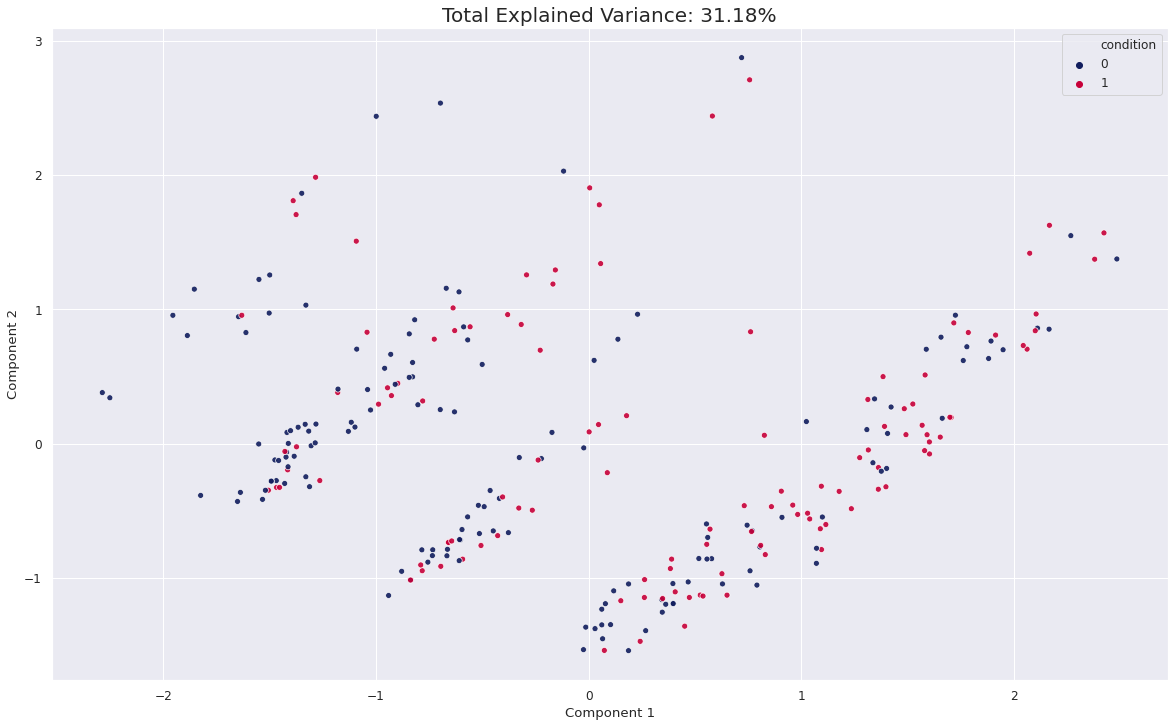

In [62]:
# Displaying 2 PCA
total_var = pca.explained_variance_ratio_.sum() * 100
fig= plt.figure(figsize=(20, 12))
ax =sns.scatterplot(matrix_2d[:, 0], matrix_2d[:, 1],palette=cust_palt[:2],
            hue=y_eli, alpha=0.9, )
ax.set_title(f'Total Explained Variance: {total_var:.2f}%', fontsize = 20)
plt.xlabel('Component 1')
plt.ylabel('Component 2')

plt.show()

In [63]:
model_check(matrix_2d, y_eli, classifiers, cv)

,Model Name,Train Roc/AUC Mean,Test Roc/AUC Mean,Test Roc/AUC Std,Train Accuracy Mean,Test Accuracy Mean,Test Acc Std,Train F1 Mean,Test F1 Mean,Test F1 Std,Time
6,MLPClassifier,0.692639,0.665574,0.060828,0.633899,0.636967,0.049115,0.551105,0.556064,0.061346,0.142249
2,DecisionTreeClassifier,0.999965,0.580305,0.042476,0.996257,0.588190,0.040862,0.995764,0.538244,0.080326,0.002180
5,AdaBoostClassifier,0.891749,0.599707,0.069080,0.789312,0.599301,0.063381,0.764873,0.526372,0.126432,0.096505
4,RandomForestClassifier,0.802907,0.621232,0.045788,0.721000,0.595667,0.052717,0.691802,0.525899,0.120604,0.079639
3,SVC,0.704544,0.665399,0.076612,0.655465,0.622013,0.052702,0.575432,0.519692,0.084225,0.003778
7,GaussianNB,0.678054,0.668739,0.060883,0.641398,0.610622,0.056214,0.540798,0.506616,0.076316,0.001444
0,GradientBoostingClassifier,0.990091,0.592508,0.026871,0.947563,0.569322,0.032888,0.940657,0.488823,0.103749,0.097488
1,KNeighborsClassifier,0.798487,0.580091,0.032593,0.731271,0.516981,0.029984,0.694693,0.438398,0.083501,0.001279


In [66]:
def prob_reg(X, y):
    
    ''' A function for displaying decision regions'''
    
    from matplotlib.colors import ListedColormap
    figure = plt.figure(figsize=(20, 40))
    h = .02
    i = 1

    # preprocess dataset, split into training and test part
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.2, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Just plot the dataset first
    cm = plt.cm.RdYlGn
    cm_bright = ListedColormap(['#e00d14', '#3ca02c'])
    ax = plt.subplot(5, 2, i)

    # Iterate over classifiers
    for clf in classifiers:
        ax = plt.subplot(math.ceil(len(classifiers) / 2), 2, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, 'decision_function'):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot the training points
        g = ax.scatter(X_train[:, 0],
                       X_train[:, 1],
                       c=y_train,
                       cmap=cm_bright,
                       edgecolors='k')
        # Plot the testing points
        ax.scatter(X_test[:, 0],
                   X_test[:, 1],
                   c=y_test,
                   cmap=cm_bright,
                   edgecolors='k',
                   alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())

        ax.set_title(clf.__class__.__name__)

        ax.set_xlabel('Component 1')
        ax.set_ylabel('Component 2')
        plt.legend(handles=g.legend_elements()[0],
                   labels=['No Disease', 'Has Disease'],
                   framealpha=0.3,
                   scatterpoints=1)

        i += 1

    plt.tight_layout()
    plt.show()

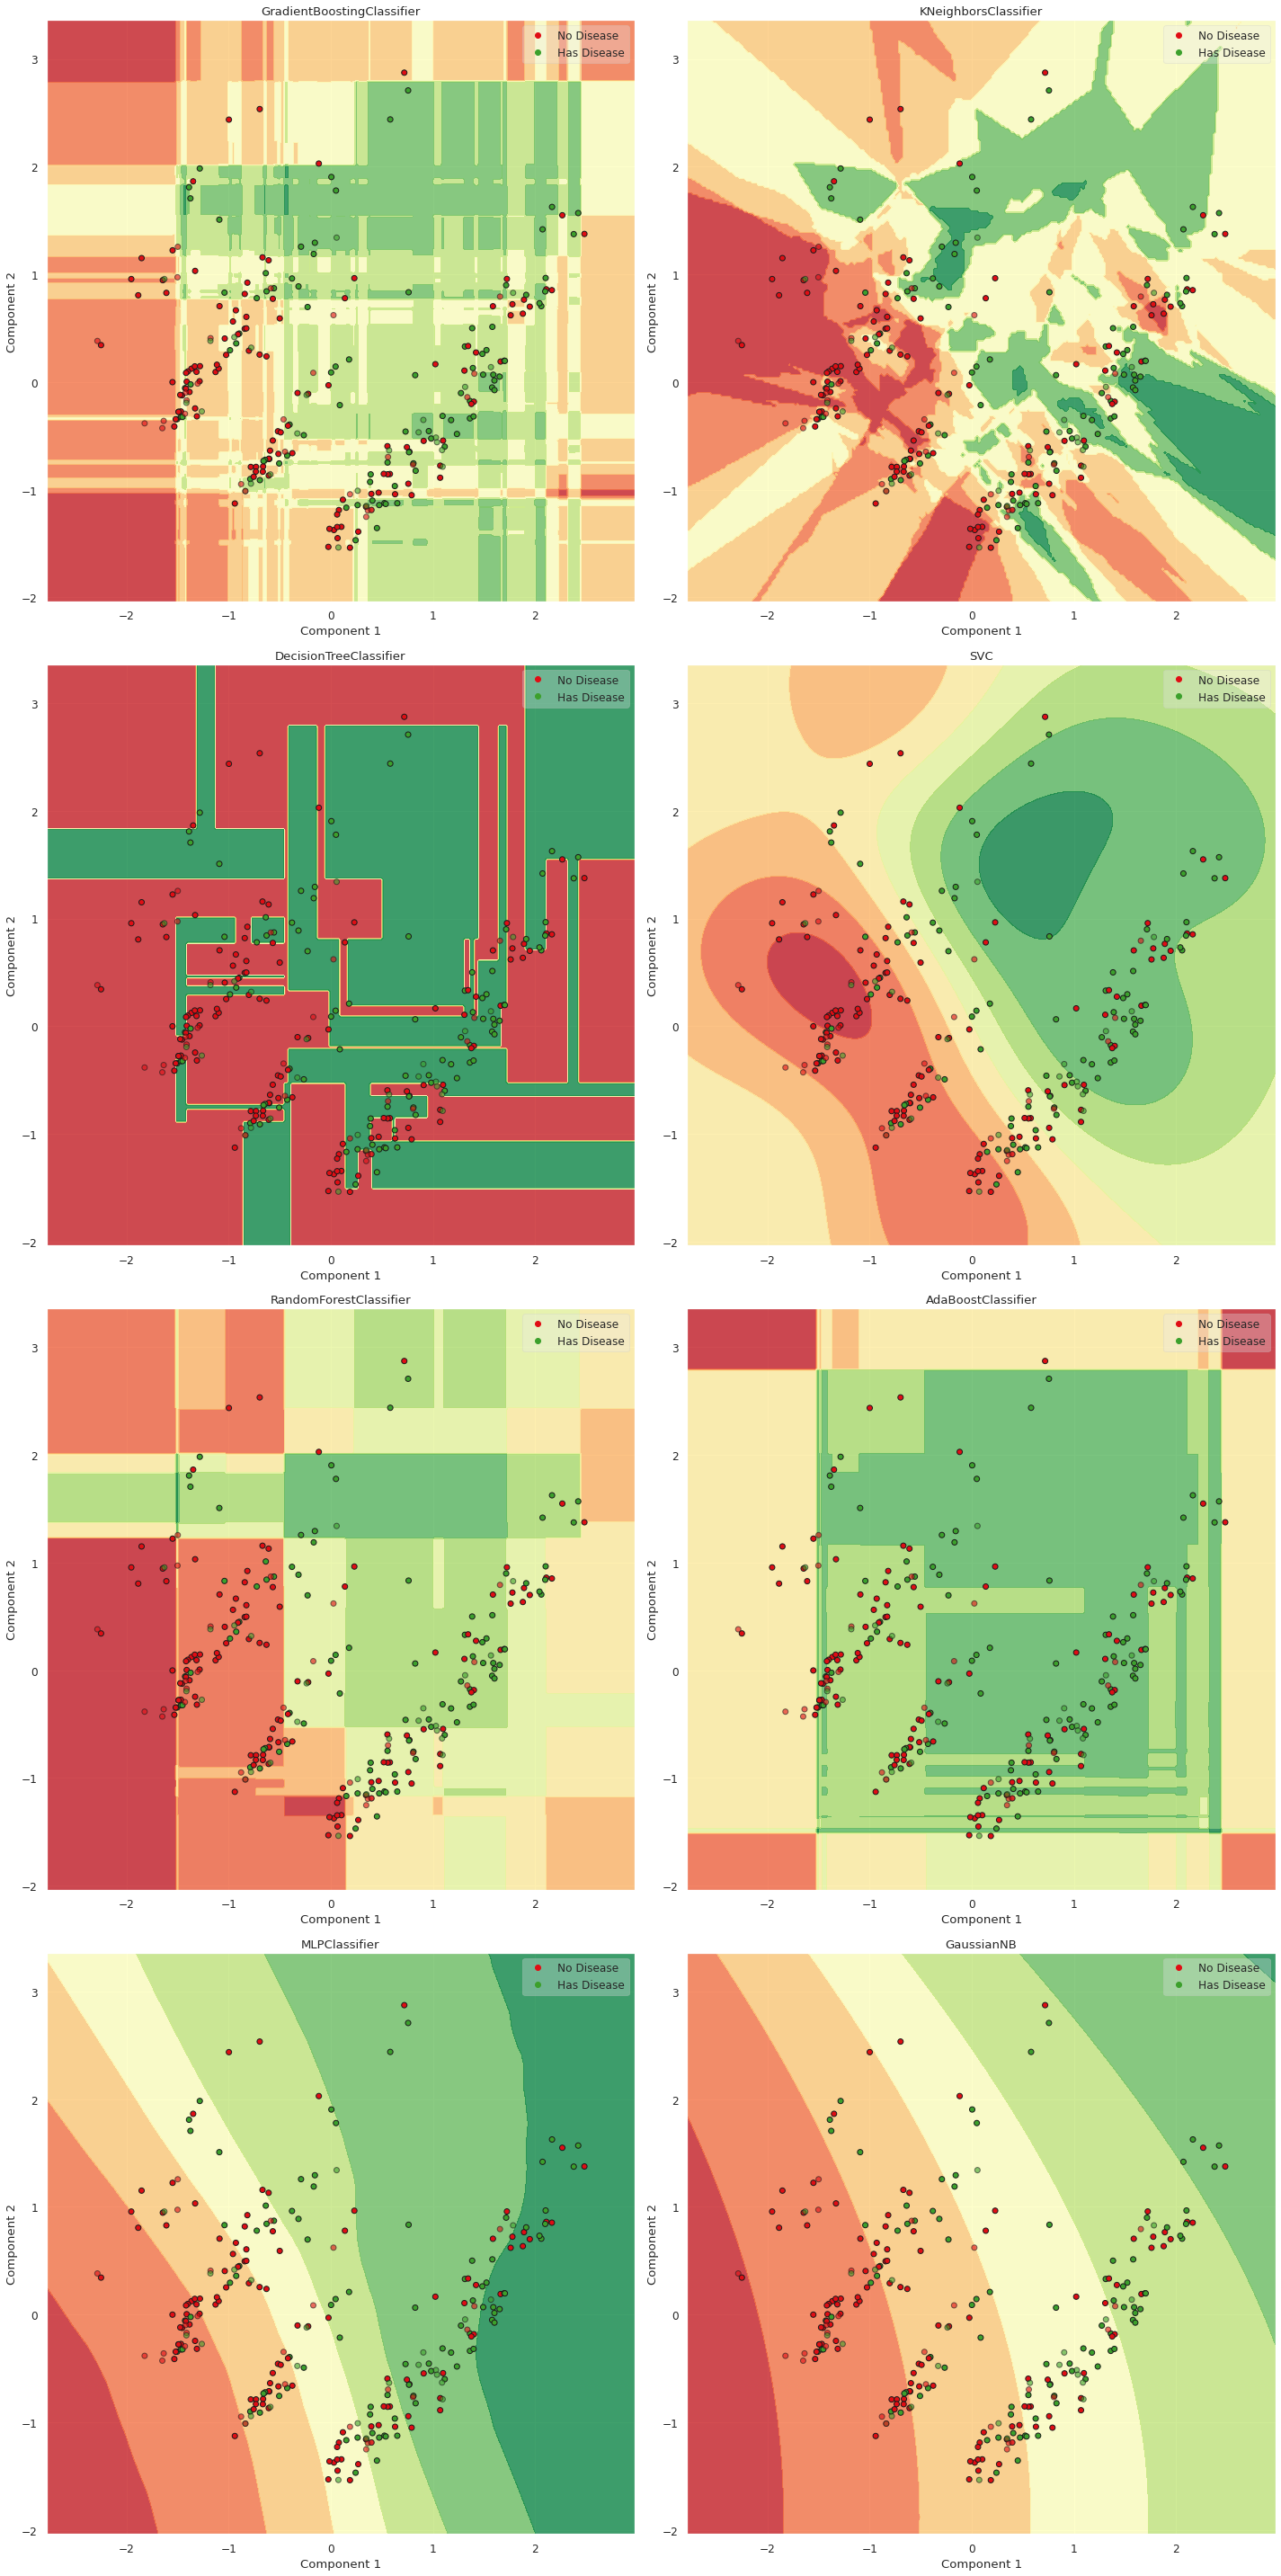

In [67]:
prob_reg(matrix_2d, y_eli)

Confusion Matrix
One last thing before we finish our sklearn journey I wanted to use another cool sklearn tool to show confusion matrices for each model. It's important for this case since we don't want our models to predict no disease on actually unhealty person or vice versa. It'd be very bad for patients in actual use. So we want less false positives and negatives but don't forget we still have some overfitted models so be careful about checking overfitted models like decision tree etc.

In [69]:
def conf_mat(X,y, classifiers):
    
    ''' A function for displaying confusion matrices'''
    
    fig, axes = plt.subplots(4,2, figsize=(20,12))
    
    axes = axes.flatten()

    for ax, classifier in zip(axes, classifiers):
        classifier.fit(X,y)
        plot_confusion_matrix(classifier, X, y,
                                         values_format = 'n',
                                         display_labels = ['No Disease', 'Diease'],
                                         cmap='summer_r',ax=ax)
        ax.set_title(f'{classifier.__class__.__name__}')
        ax.grid(False)
        plt.tight_layout()

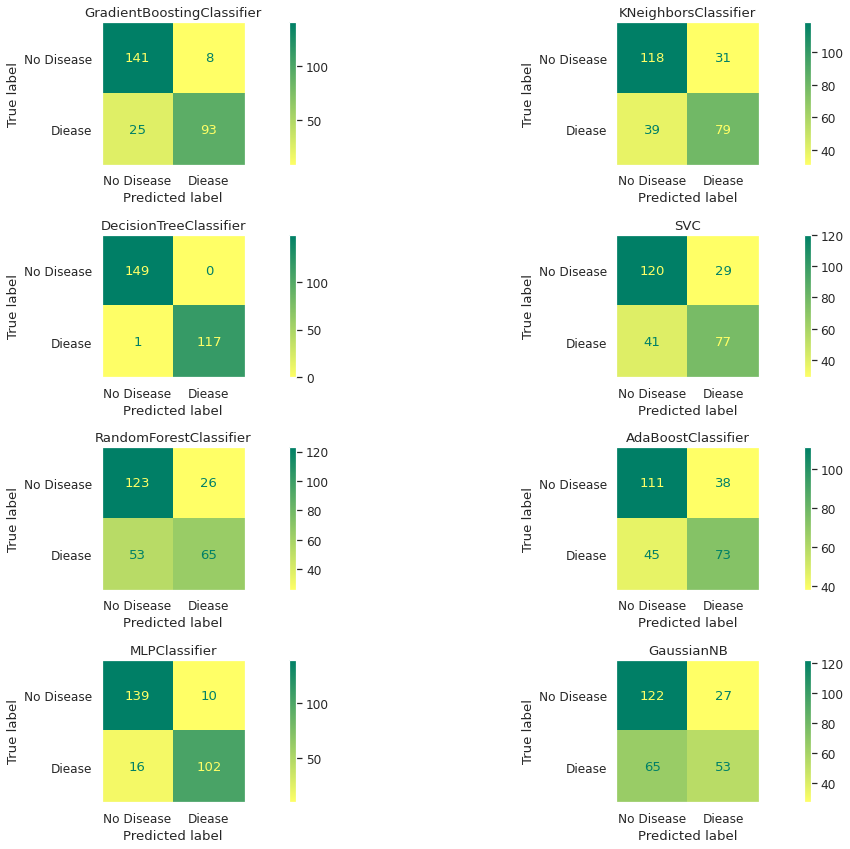

In [70]:
# Displaying confusion matrix for each estimator:

conf_mat(X_cat, y_eli, classifiers)